<a href="https://www.kaggle.com/code/nickguendel/eda-arima-model-sales-forecasting?scriptVersionId=99646060" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data vizualization
import matplotlib.pyplot as plt # data vizualization
import datetime # date time formats 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


# Understading the Data

In [2]:
df_train = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')

In [3]:
df_train.head() # View start of data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df_train.tail() # View end of data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [5]:
df_train.dtypes # view data types

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [6]:
# Convert to object dates to datetime datatypes
df_train['Order Date'] = pd.to_datetime(df_train['Order Date'])
df_train['Ship Date'] = pd.to_datetime(df_train['Ship Date'])
df_train.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df_train.shape

(9800, 18)

In [8]:
for col in df_train.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales


In [9]:
# Summarize Sales Data
df_train.describe().drop(['Row ID', 'Postal Code'], axis=1)

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [10]:
# Find the range of dates in the order list
print('Oldest \'Order Date\': ' + str(min(df_train["Order Date"])))
print('Youngest \'Order Date\': ' + str(max(df_train["Order Date"])))

Oldest 'Order Date': 2015-01-02 00:00:00
Youngest 'Order Date': 2018-12-30 00:00:00


In [11]:
# Identifing Nominal data
df_train.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [12]:
# 
df_train['Segment'].unique()
print('Unique Name and Count with \nSegment\n\n' + str(df_train['Segment'].value_counts()))
print('-------------------------------------')
print('Unique Name and Count with \nShip Mode\n\n' + str(df_train['Ship Mode'].value_counts()))
print('-------------------------------------')
print('Unique Name and Count with \nRegion\n\n' + str(df_train['Region'].value_counts()))
print('-------------------------------------')
print('Unique Name and Count with \nCategory\n\n' + str(df_train['Category'].value_counts()))
print('-------------------------------------')
print('Unique Name and Count with Sub-Category\n\n' + str(df_train['Sub-Category'].value_counts()))


Unique Name and Count with 
Segment

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64
-------------------------------------
Unique Name and Count with 
Ship Mode

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64
-------------------------------------
Unique Name and Count with 
Region

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64
-------------------------------------
Unique Name and Count with 
Category

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64
-------------------------------------
Unique Name and Count with Sub-Category

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases      

In [13]:
print('Column Name and Count of NULL Values\n\n' + str(df_train.isnull().sum()))

Column Name and Count of NULL Values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


* There are no null values in the regions but there are 11 Postal Code Null observations. Which regions have the NULL postal codes? (all NULL Postal Code values on in Burlington, Vt)

In [14]:
df_train[df_train['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [15]:
df_train[df_train['City'] == 'Burlington']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
683,684,US-2018-168116,2018-04-11,2018-04-11,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,685,US-2018-168116,2018-04-11,2018-04-11,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1008,1009,US-2018-106705,2018-12-26,2019-01-01,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1038,1039,CA-2018-121818,2018-11-20,2018-11-21,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10000203,Office Supplies,Art,Newell 336,23.968
1039,1040,CA-2018-121818,2018-11-20,2018-11-21,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728
1393,1394,CA-2018-124828,2018-03-07,2018-04-07,First Class,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,2235,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2928,2929,US-2018-120390,2018-10-19,2018-10-26,Standard Class,TH-21550,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,5066,CA-2018-142090,2018-11-30,2018-07-12,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,TEC-AC-10002001,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,5067,CA-2018-142090,2018-11-30,2018-07-12,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682


There are 11 missing postal codes and all of them are in Burlington, Vermont. Burlington, VT has 5 postal codes so I'm unable to update with knowing more information. There are other cities with the name Burlington in different states so any geolocation should include both city and state data.

# Relationships between variables

In [16]:
# Calculating log of sales
df_train['Log_of_Sales'] = [np.log(s) for s in df_train['Sales']]
df_train.describe()

,Row ID,Postal Code,Sales,Log_of_Sales
count,9800.000000,9789.000000,9800.000000,9800.000000
mean,4900.500000,55273.322403,230.769059,4.111104
std,2829.160653,32041.223413,626.651875,1.646014
min,1.000000,1040.000000,0.444000,-0.811931
25%,2450.750000,23223.000000,17.248000,2.847696
50%,4900.500000,58103.000000,54.490000,3.998017
75%,7350.250000,90008.000000,210.605000,5.349984
max,9800.000000,99301.000000,22638.480000,10.027406


<Figure size 1080x576 with 0 Axes>

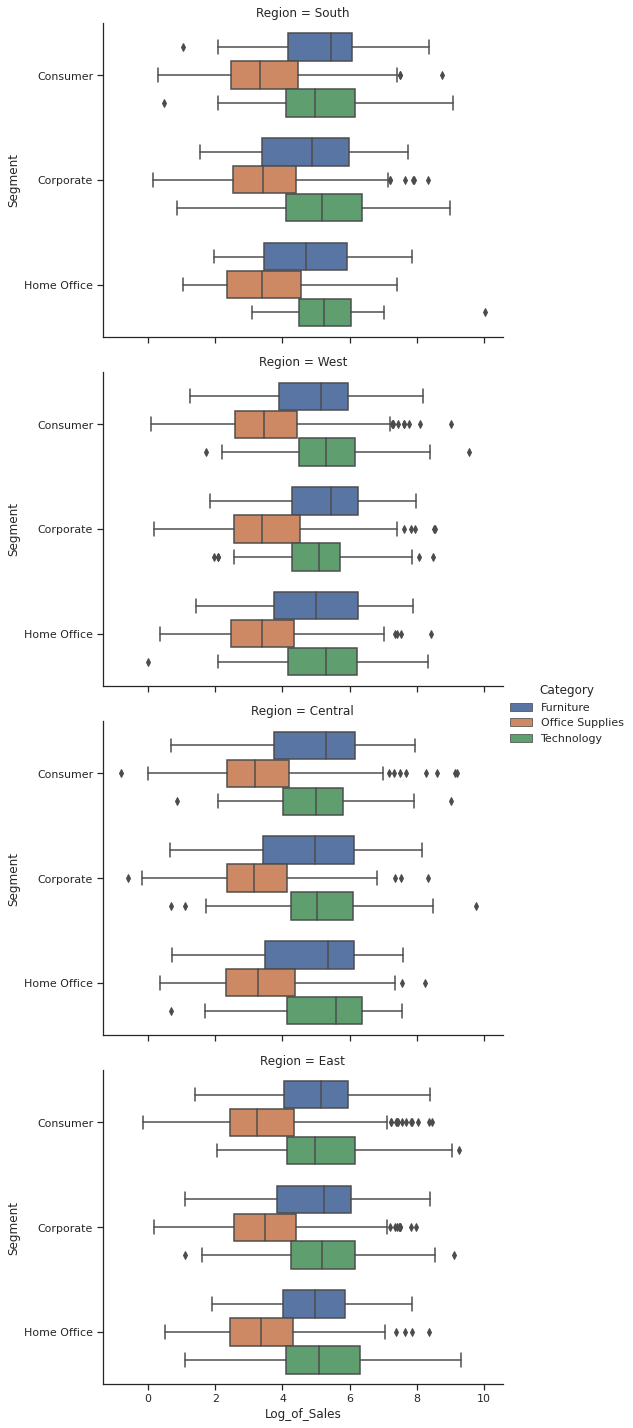

<Figure size 1080x576 with 0 Axes>

In [17]:
sns.set_theme(style='ticks', color_codes=True)
sns.catplot(data=df_train, x='Log_of_Sales', y='Segment', hue='Category', kind='box', row='Region', orient='h', aspect=1.5, height=5)

plt.figure(figsize = (15,8))

The plots above show the categories of the data to have normal distributions.

# Time Series Plots - Is it stationary?

* Plotting sales over time could be helpful to understanding if the data is stationary and allow for certain types of forecasting models

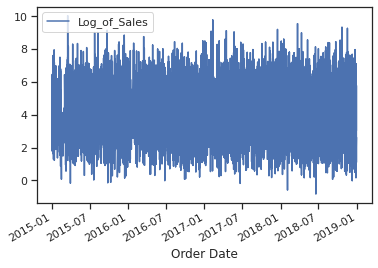

In [18]:
df_train_order = df_train[['Order Date', 'Sales', 'Log_of_Sales']]
df_train_order.plot('Order Date', 'Log_of_Sales')
plt.rcParams['figure.figsize'] = [32, 5]

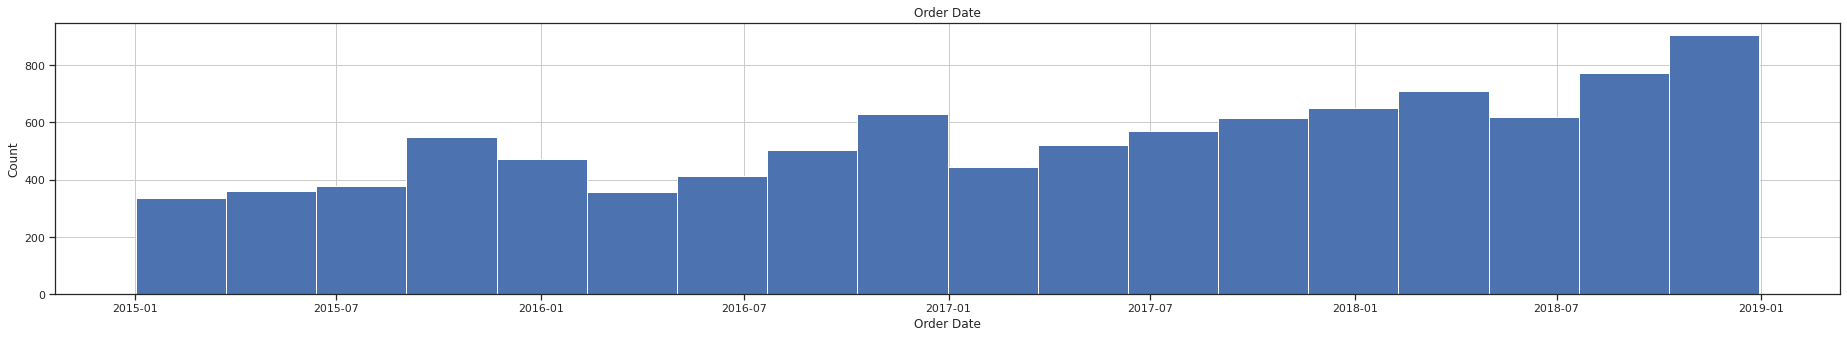

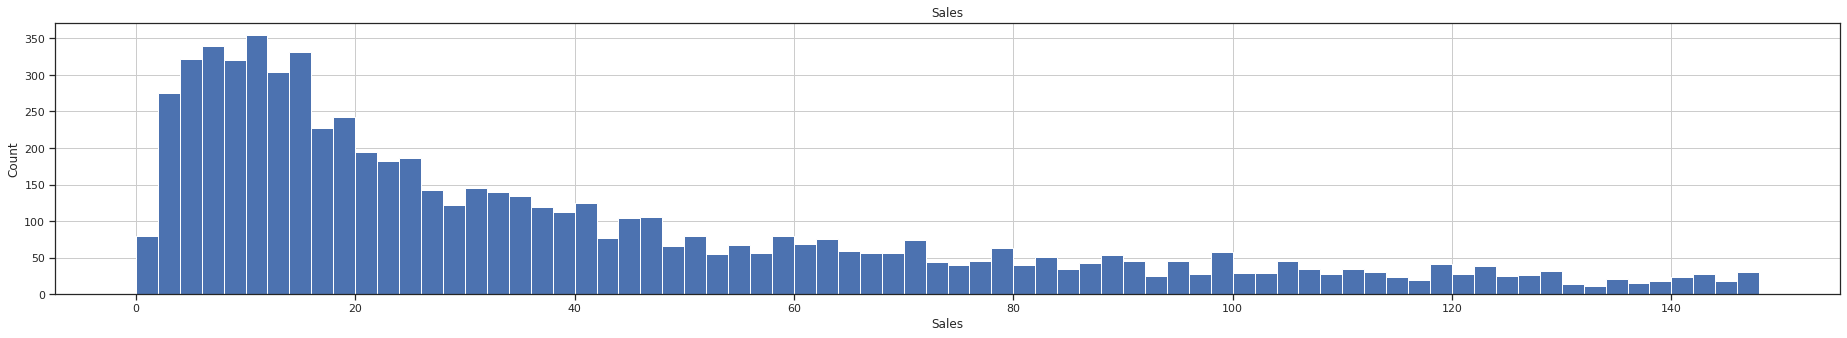

In [19]:
df_train_order.hist('Order Date', bins=18)
plt.xlabel("Order Date")
plt.ylabel("Count")
binwidth = 2
df_train_order.hist('Sales', bins=range(int(min(df_train_order['Sales'])), 150, binwidth))
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

* Time series data looks flat and could be stationary, but its difficult to tell and an Augmented Dickey-Fuller Test shows that the p-value is less than 0.05, thus the data is Stationary.

In [20]:
from statsmodels.tsa.stattools import adfuller
#series = read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze=True)
X = df_train[['Order Date', 'Sales']].set_index('Order Date')
X.head()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -98.335553
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


* Autocorrelation and Partial Autocorrelation Plots show one significant spike at the beginning AR1

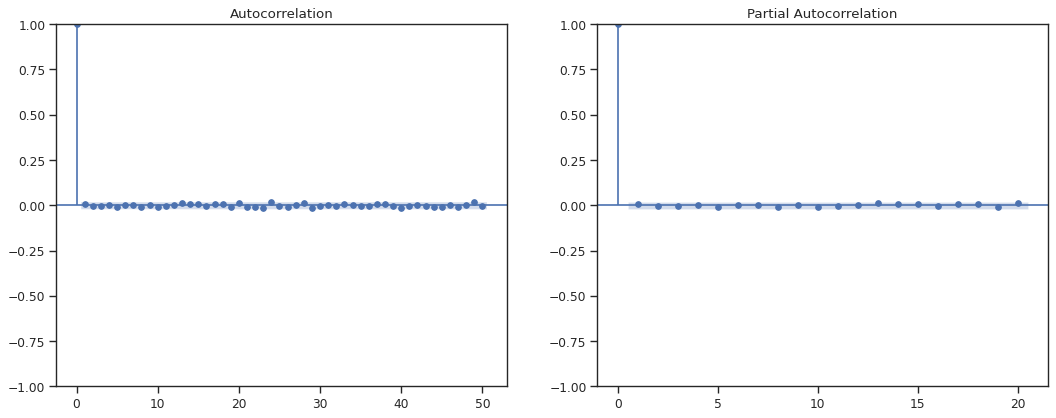

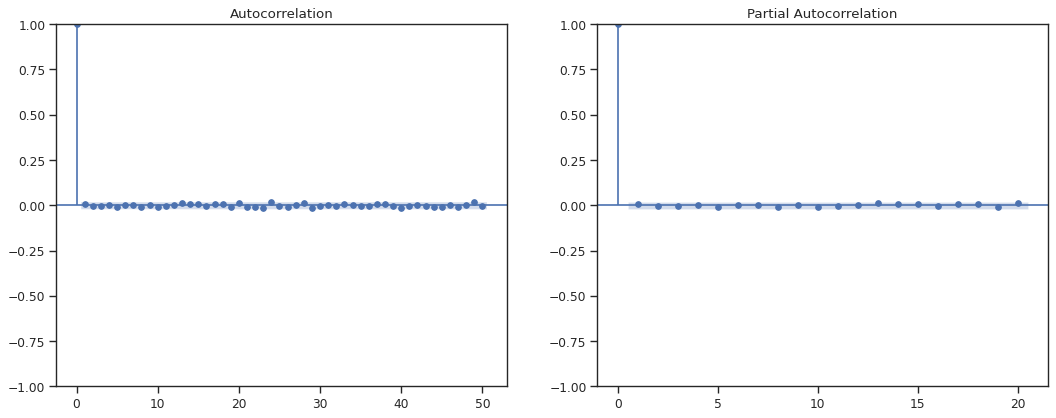

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df_train.Sales.tolist(), ax=ax1, lags=50)
plot_pacf(df_train.Sales.tolist(), ax=ax2, lags=20, method='ywm')

In [22]:
df_train_rolling = df_train[['Order Date', 'Sales', 'Log_of_Sales']].sort_values(by='Order Date')
df_train_rolling[['Sales', 'Log_of_Sales']] = df_train_rolling[['Sales','Log_of_Sales']].rolling(7).mean()
df_train_rolling.tail(0)

,Order Date,Sales,Log_of_Sales


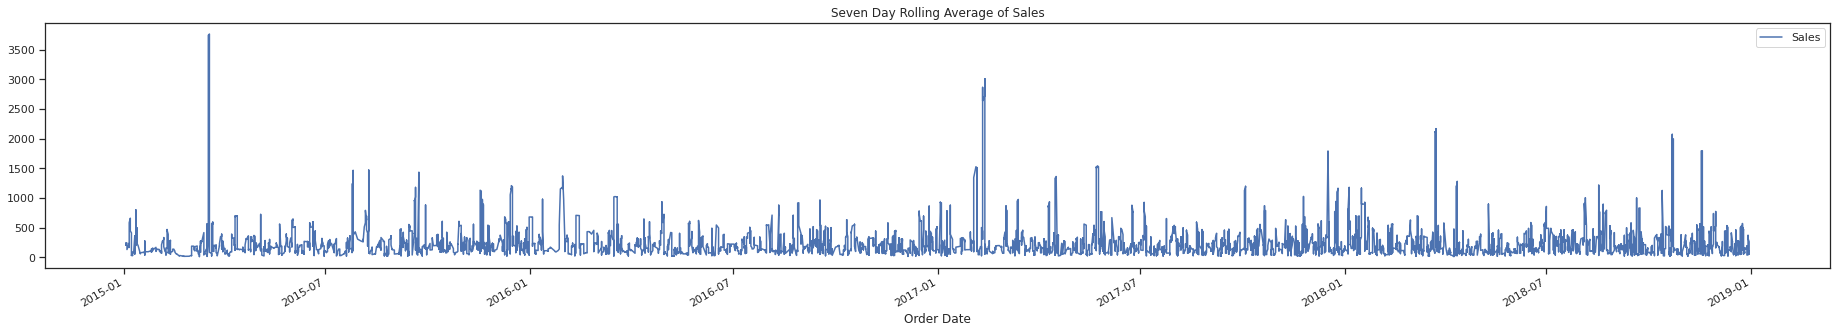

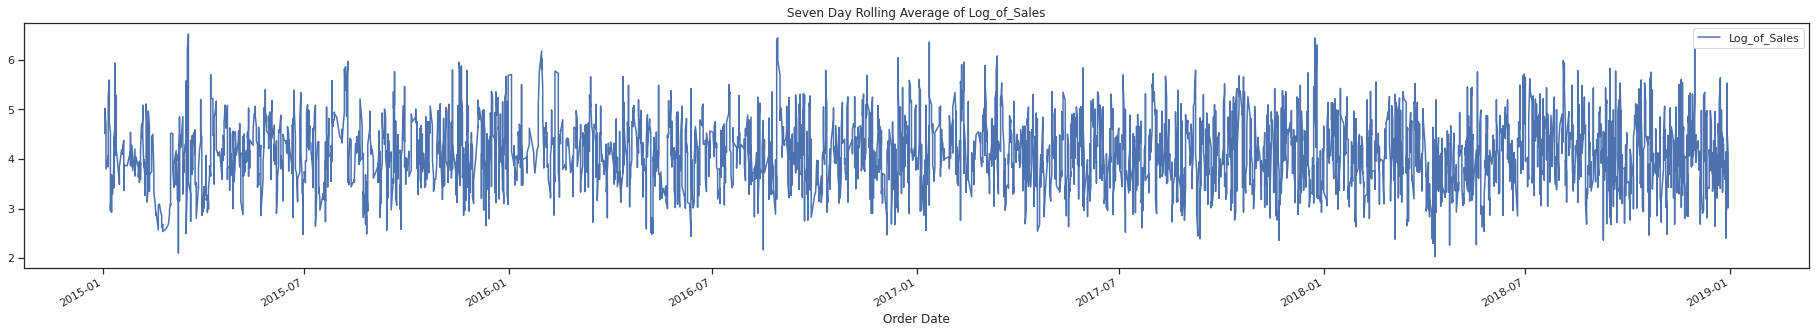

In [23]:
df_train_rolling.plot('Order Date', 'Sales')
plt.title('Seven Day Rolling Average of Sales')
df_train_rolling.plot('Order Date', 'Log_of_Sales')
plt.title('Seven Day Rolling Average of Log_of_Sales')
plt.show()

**Next Steps are to build a predictive forcasting model using ARMI**